<a href="https://colab.research.google.com/github/EsmatAfsoon/diabetes-iridology/blob/master/unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/mydrive")

Mounted at /content/mydrive


# New Section

In [4]:
!pip install tensorflow
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf

def conv_block(input_tensor, filters):
  x = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "SAME")(input_tensor)
  x = tf.keras.layers.Activation("relu")(x)
  return x

def up_concate_decoder(input_tensor, input_encoder):
  up = tf.keras.layers.UpSampling2D()(input_tensor)
  concate = tf.keras.layers.Concatenate(axis=-1)([up, input_encoder])
  return concate

def unet(num_classes = 4):

  #ENCODER

  input_layer = tf.keras.layers.Input(shape = (256,256,1))
  #BLOCK 1 + MAXPOOL
  conv_block_1_step_1 = conv_block(input_layer, filters = 64)
  conv_block_1_step_2 = conv_block(conv_block_1_step_1, filters = 64)
  max_pool_block_1_to_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv_block_1_step_2)

  #BLOCK 2 + MAXPOOL
  conv_block_2_step_1 = conv_block(max_pool_block_1_to_2, filters = 128)
  conv_block_2_step_2 = conv_block(conv_block_2_step_1, filters = 128)
  max_pool_block_2_to_3 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv_block_2_step_2)

  #BLOCK 3 + MAXPOOL
  conv_block_3_step_1 = conv_block(max_pool_block_2_to_3, filters = 256)
  conv_block_3_step_2 = conv_block(conv_block_3_step_1, filters = 256)
  max_pool_block_3_to_4 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv_block_3_step_2)

  #BLOCK 4 + MAXPOOL
  conv_block_4_step_1 = conv_block(max_pool_block_3_to_4, filters = 512)
  conv_block_4_step_2 = conv_block(conv_block_4_step_1, filters = 512)
  max_pool_block_4_to_5 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv_block_4_step_2)

  #latent space
  conv_block_5_step_1 = conv_block(max_pool_block_4_to_5, filters = 1024)
  conv_block_5_step_2 = conv_block(conv_block_5_step_1, filters = 1024)

  #DECODER

  #Block 4 + UpSample
  decoder_block_4_step_1 = up_concate_decoder(conv_block_5_step_2, conv_block_4_step_2)
  decoder_block_4_step_2 = conv_block(decoder_block_4_step_1, filters = 512)
  decoder_block_4_step_3 = conv_block(decoder_block_4_step_2, filters = 512)

  #Block 3 + UpSample
  decoder_block_3_step_1 = up_concate_decoder(decoder_block_4_step_3, conv_block_3_step_2)
  decoder_block_3_step_2 = conv_block(decoder_block_3_step_1, filters = 256)
  decoder_block_3_step_3 = conv_block(decoder_block_3_step_2, filters = 256)

  #Block 2 + UpSample
  decoder_block_2_step_1 = up_concate_decoder(decoder_block_3_step_3, conv_block_2_step_2)
  decoder_block_2_step_2 = conv_block(decoder_block_2_step_1, filters = 128)
  decoder_block_2_step_3 = conv_block(decoder_block_2_step_2, filters = 128)

  #Block 1 + UpSample
  decoder_block_1_step_1 = up_concate_decoder(decoder_block_2_step_3, conv_block_1_step_2)
  decoder_block_1_step_2 = conv_block(decoder_block_1_step_1, filters = 64)
  decoder_block_1_step_3 = conv_block(decoder_block_1_step_2, filters = 64)

  output = tf.keras.layers.Conv2D(num_classes, (1, 1))(decoder_block_1_step_3)
  output = tf.keras.layers.Activation("softmax")(output)

  model = tf.keras.models.Model(inputs=input_layer, outputs = output)
  return model

model = unet()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['activation[0][0]']          
                                                                                              

Number of cases :  24
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[0 1 2 3 4 5 6 7]
Starting Fold number 1
Number of training samples are 10192
Number of validation samples are 392


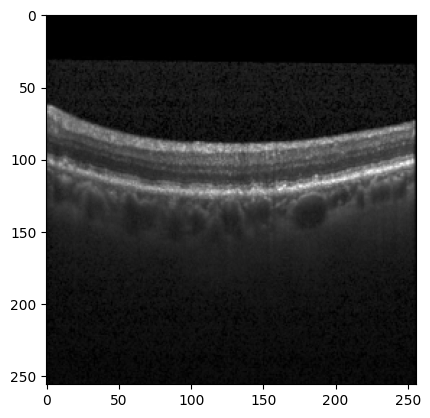

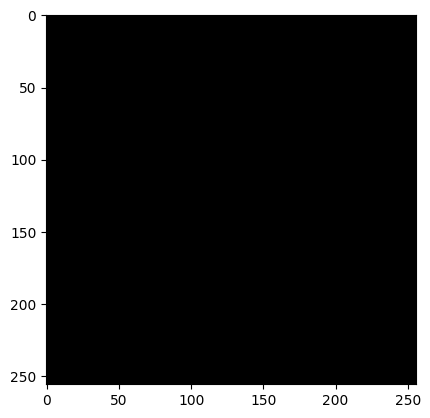

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_494 (Conv2D)         (None, 256, 256, 64)         640       ['input_27[0][0]']            
                                                                                                  
 activation_494 (Activation  (None, 256, 256, 64)         0         ['conv2d_494[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_495 (Conv2D)         (None, 256, 256, 64)         36928     ['activation_494[0][0]'

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▋         | 1/16 [00:00<00:11,  1.31it/s]/usr/local/lib/python3.10/d

----------------- background -----------------
Accuracy          :  0.9911670684814453
Balaned Accuracy  :  0.7803905806123175
Dice              :  0.9955396316945553
Iou               :  0.9911672025918961
----------------- IRF -----------------
Accuracy          :  0.9931678771972656
Balaned Accuracy  :  0.781246156909505
Dice              :  0.5215833188085526
Iou               :  0.5215833188085526
----------------- SRF -----------------
Accuracy          :  0.9999542236328125
Balaned Accuracy  :  0.9999542236328125
Dice              :  0.621426006546244
Iou               :  0.621426006546244
----------------- PED -----------------
Accuracy          :  0.9980449676513672
Balaned Accuracy  :  0.7804238519118144
Dice              :  0.017065358864783775
Iou               :  0.017065358864783775
--------------------------------------------------
Fold number 1 finished
--------------------------------------------------








[ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23]
[ 8  9 10

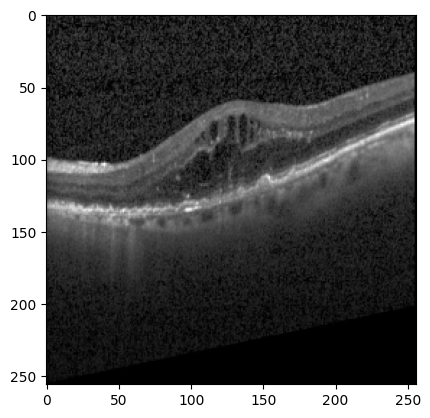

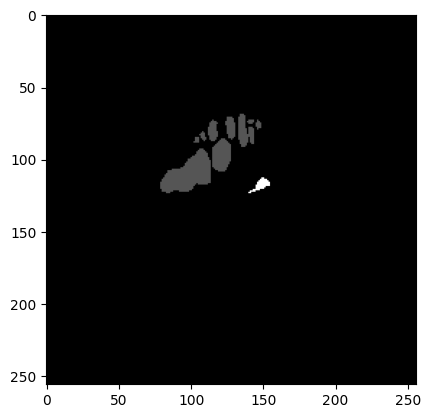

Model: "model_27"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_28 (InputLayer)       [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_513 (Conv2D)         (None, 256, 256, 64)         640       ['input_28[0][0]']            
                                                                                                  
 activation_513 (Activation  (None, 256, 256, 64)         0         ['conv2d_513[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_514 (Conv2D)         (None, 256, 256, 64)         36928     ['activation_513[0][0]'

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to c

----------------- background -----------------
Accuracy          :  0.020656585693359375
Balaned Accuracy  :  0.3125926087789152
Dice              :  0.0002715344885473314
Iou               :  0.0001435819867765531
----------------- IRF -----------------
Accuracy          :  0.9746360778808594
Balaned Accuracy  :  0.7947870416804743
Dice              :  0.0011086812082794495
Iou               :  0.0008729163746465929
----------------- SRF -----------------
Accuracy          :  0.3473691940307617
Balaned Accuracy  :  0.40497209486714264
Dice              :  0.016219248142988363
Iou               :  0.008299658605210425
----------------- PED -----------------
Accuracy          :  0.671809196472168
Balaned Accuracy  :  0.5173655883395354
Dice              :  0.009350021040063439
Iou               :  0.004751416710405465
--------------------------------------------------
Fold number 2 finished
--------------------------------------------------








[ 0  1  2  3  4  5  6  7  8  9 10 11 1

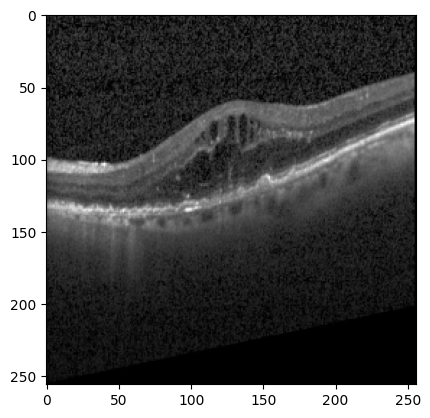

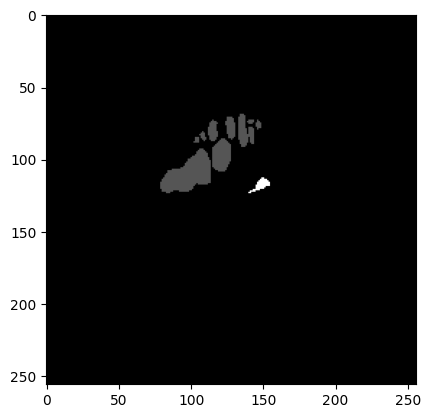

Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_29 (InputLayer)       [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_532 (Conv2D)         (None, 256, 256, 64)         640       ['input_29[0][0]']            
                                                                                                  
 activation_532 (Activation  (None, 256, 256, 64)         0         ['conv2d_532[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_533 (Conv2D)         (None, 256, 256, 64)         36928     ['activation_532[0][0]'

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  6%|▋         | 1/16 [00:01<00:16,  1.13s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

----------------- background -----------------
Accuracy          :  0.019609451293945312
Balaned Accuracy  :  0.4691723622408123
Dice              :  0.0019510910024109762
Iou               :  0.0009851458671619184
----------------- IRF -----------------
Accuracy          :  0.6011877059936523
Balaned Accuracy  :  0.5036132752703868
Dice              :  0.020391864252360392
Iou               :  0.01048921926985713
----------------- SRF -----------------
Accuracy          :  0.9759759902954102
Balaned Accuracy  :  0.9759759902954102
Dice              :  0.0006605309263250092
Iou               :  0.0006605309263250092
----------------- PED -----------------
Accuracy          :  0.4283008575439453
Balaned Accuracy  :  0.645756555767447
Dice              :  0.024477742309727546
Iou               :  0.012470382221408727
--------------------------------------------------
Fold number 3 finished
--------------------------------------------------









 Overall Results on DATABASE
╒═════════

In [22]:
import numpy as np
import tensorflow_addons as tf
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import KFold
from DataReader import DataReader
from results import Results
import glob


dataset_name = "Spectralis"

path = "/content/mydrive/MyDrive/Spectralis/retouch_data"
data_path = []
for path in glob.glob(path + '/*'):
    data_path.append(path)
print("Number of cases : ", len(data_path))

data_reader = DataReader()
my_results = Results()

train_flag = 0
SEED = 100
NUM_EPOCHS = 30
BATCH_SIZE = 40
BUFFER_SIZE = 10000
AUTOTUNE = tf.data.experimental.AUTOTUNE
kf = KFold(n_splits = 3)
i = 1
overall_results = []

for train_path, val_path in kf.split(data_path):
    print(train_path)
    print(val_path)
    print("Starting Fold number {}".format(i))
    train_path, val_path = data_reader.get_trainPath_and_valPath(train_path, val_path, data_path)
    train_data, val_data = data_reader.get_data_for_train(train_path, val_path)
    for image, mask in train_data.take(1):
      plt.imshow(image,cmap = "gray")
      plt.show()
      plt.imshow(mask,cmap = "gray")
      plt.show()
                       #steps_per_epoch = num_of_train_samples // BATCH_SIZE,

    train_data = train_data.take(24)
    val_data = val_data.take(16)
    num_of_train_samples = len(train_data)
    num_of_val_samples = len(val_data)
    train_data = train_data.shuffle(buffer_size=BUFFER_SIZE, seed=SEED).batch(BATCH_SIZE).prefetch(buffer_size = AUTOTUNE)
    val_data = val_data.batch(1).prefetch(buffer_size = AUTOTUNE)
    model = unet()
    model.summary()
    initial_learning_rate = 3e-4

    # Learning Rate Scheduler
    lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.98,
        staircase=True)

    if train_flag:
        if not os.path.exists(dataset_name):
          os.mkdir(dataset_name)
    # Creating Callbacks
        checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(dataset_name + "/model_checkpoint_%s.hdf5"%i,save_best_only=True)


        model.compile(optimizer = tf.keras.optimizers.Adam(initial_learning_rate),
                      loss = "sparse_categorical_crossentropy",
                      metrics = ["loss_funcs.dice_coeff"])



        history = model.fit(train_data,epochs=NUM_EPOCHS,validation_data = val_data,
                            validation_steps = num_of_val_samples // BATCH_SIZE,
                            callbacks=[checkpoint_cb])

        model.save(dataset_name + "/model_%s.hdf5"%i)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle('Learning Curves')

        axs[0].set_title('Model Loss')
        axs[0].plot(history.history['loss'], label='train')
        axs[0].plot(history.history['val_loss'], label='val')
        axs[0].legend()
        axs[0].set(xlabel='Epoch', ylabel='Overall-Loss')

        axs[1].set_title('Model Dice Performance')
        axs[1].plot(history.history['dice_coeff'], label='train')
        axs[1].plot(history.history['val_dice_coeff'], label='val')
        axs[1].legend()
        axs[1].set(xlabel='Epoch', ylabel='Main output dice_coeff')

        plt.show()

    predictions = model.predict(val_data)
    print("predictions  shape in train.py : ", predictions.shape)
    acc_mean, dice_mean, f1_score_mean, precision_mean, bacc_mean, recall_mean, iou_mean  = my_results.results_per_layer(predictions, val_data)
    overall_results.append([acc_mean, dice_mean, f1_score_mean, precision_mean, bacc_mean, recall_mean, iou_mean ])

    print('-'*50)
    print('Fold number {} finished'.format(i))
    print('-'*50)

    print('\n')
    print('\n')
    print('\n')
    print('\n')

    i += 1

my_results.print_overall_results(overall_results)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch
!pip install torchvision